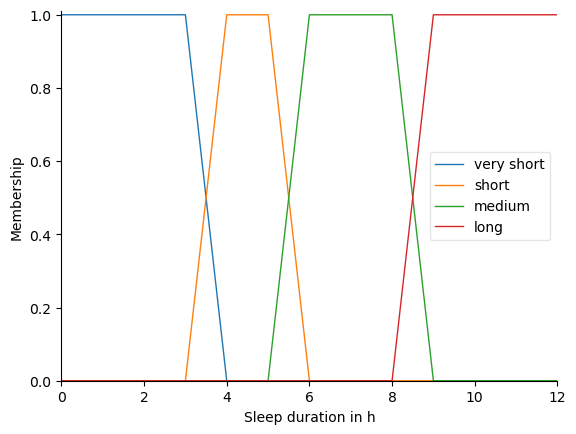

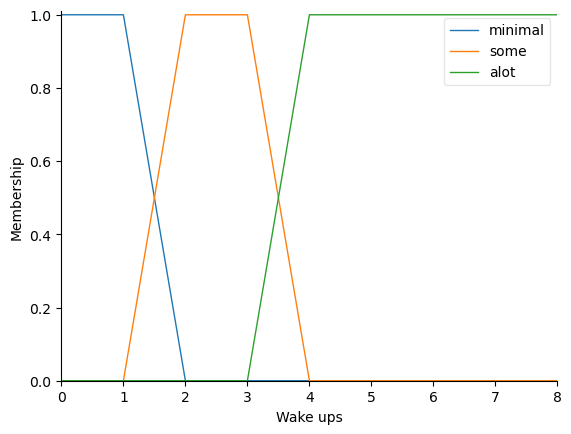

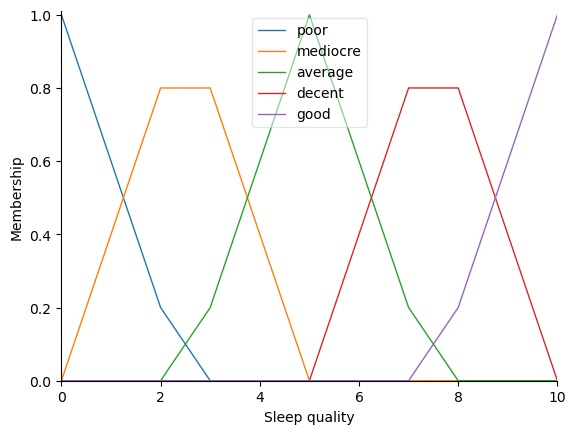

In [49]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership functions
duration = ctrl.Antecedent(np.arange(0, 13, 1), 'Sleep duration in h')
wake_ups = ctrl.Antecedent(np.arange(0, 9, 1), 'Wake ups')
sleep_quality = ctrl.Consequent(np.arange(0, 11, 1), 'Sleep quality')

# Custom membership functions for duration
duration['very short'] = fuzz.trapmf(duration.universe, [0, 0, 3, 4])
duration['short'] = fuzz.trapmf(duration.universe, [3, 4, 5, 6])
duration['medium'] = fuzz.trapmf(duration.universe, [5, 6, 8, 9])
duration['long'] = fuzz.trapmf(duration.universe, [8, 9, 12, 12])

# Custom membership functions for wake-ups
wake_ups['minimal'] = fuzz.trapmf(wake_ups.universe, [0, 0, 1, 2])
wake_ups['some'] = fuzz.trapmf(wake_ups.universe, [1, 2, 3, 4])
wake_ups['alot'] = fuzz.trapmf(wake_ups.universe, [3, 4, 8, 8])

# Automatic membership functions for sleep quality with 5 terms
sleep_quality.automf(5)

# You can see how these look with .view()
duration.view()
wake_ups.view()
sleep_quality.view()

In [56]:
rule1 = ctrl.Rule(duration['very short'] , sleep_quality['poor'], label='very_short_minimal')
rule2 = ctrl.Rule(duration['short'] & wake_ups['minimal'], sleep_quality['mediocre'], label='short_minimal')
rule3 = ctrl.Rule(duration['short'] & wake_ups['some'], sleep_quality['poor'], label='short_some')
rule4 = ctrl.Rule(duration['short'] & wake_ups['alot'], sleep_quality['poor'], label='short_alot')
rule5 = ctrl.Rule(duration['medium'] & wake_ups['minimal'], sleep_quality['decent'], label='medium_minimal')
rule6 = ctrl.Rule(duration['medium'] & wake_ups['some'], sleep_quality['average'], label='medium_some')
rule7 = ctrl.Rule(duration['medium'] & wake_ups['alot'], sleep_quality['mediocre'], label='medium_alot')
rule8 = ctrl.Rule(duration['long'] & wake_ups['minimal'], sleep_quality['good'], label='long_minimal')
rule9 = ctrl.Rule(duration['long'] & wake_ups['some'], sleep_quality['average'], label='long_some')
rule10 = ctrl.Rule(duration['long'] & wake_ups['alot'], sleep_quality['mediocre'], label='long_alot')

# Create control system and simulation
sleep_ctrl = ctrl.ControlSystem([rule1,rule2,rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
sleep_simulation = ctrl.ControlSystemSimulation(sleep_ctrl)

Quality value: 9.102564102564102


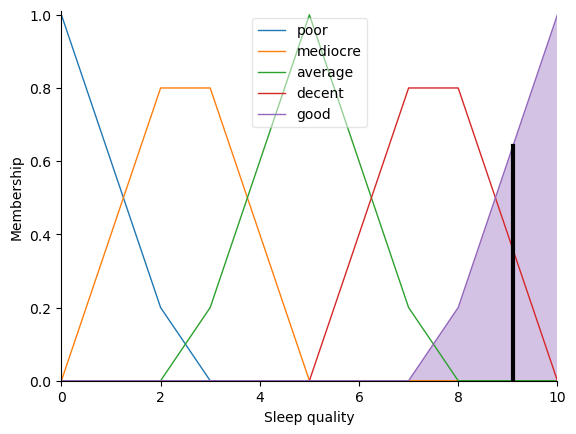

In [64]:
# sleepduration  in hours
sleep_simulation.input['Sleep duration in h'] = 10
sleep_simulation.input['Wake ups'] = 0

# Crunch the numbers
sleep_simulation.compute()

quality_value = sleep_simulation.output['Sleep quality']
print(f"Quality value: {quality_value}")

sleep_quality.view(sim=sleep_simulation)